In [15]:
# import packages
import requests
import os
import json
import re
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import original tweet data
file1 = open("TwitterData.txt", "r")
textfile = file1.read()
tweets = textfile.splitlines()
while("" in tweets) :
    tweets.remove("")

In [3]:
# List to save slang percentage of each tweet
slangPerc = []
# LINUX kernel English dictionary
file = open("/usr/share/dict/words", "r")
# list of words in English dictionary
words = re.sub("[^\w]", " ",  file.read()).split()
# Compares words in tweet to English dictionary to identify slang
for i in range(len(tweets)):
    # count slang words in tweet
    count = 0
    # list of words in the tweet
    tweetWords = tweets[i].split()
    if len(tweetWords) != 0:
        # iterate through list to compare each word to English dictionary to check for slang
        for j in range(len(tweetWords)):
            word = tweetWords[j]
            if word.strip().lower() in words:
                continue
            else:
                count += 1
        slangPerc.append(count/len(tweetWords))

In [4]:
# list of re-translated tweets
file2 = open("TranslatedData.txt", "r")
textfile = file2.read()
translatedTweets = textfile.splitlines()
while("" in translatedTweets) :
    translatedTweets.remove("")

In [5]:
# List to save match percentage of each tweet
matchPerc = []
# Compares words in re-translated tweet to original tweet
for i in range(len(translatedTweets)):
    # list of words in original tweet
    words = tweets[i].split()
    # count matched words in tweet
    count = 0
    # list of words in the re-translated tweet
    tweetWords = translatedTweets[i].split()
    # iterate through list to compare each word to English dictionary to check for slang
    for j in range(len(tweetWords)):
        try:
            word1 = tweetWords[j]
            word2 = words[j]
            if word1.strip().lower() == word2.strip().lower():
                count += 1
        except:
            continue
    matchPerc.append(count/len(tweetWords))

In [26]:
# Create dataframe of slang percentage and match percentage for each tweet
df = pd.DataFrame(list(zip(slangPerc, matchPerc)), columns =['Slang_Percentage', 'Match_Percentage'])

In [14]:
# Run OLS regression of match percentage on slang percentage

,Slang Percentage,Match Percentage
0,0.400000,1.000000
1,0.375000,0.333333
2,0.647059,1.000000
3,0.600000,0.950000
4,0.461538,0.642857
5,0.000000,0.000000
6,0.230769,0.923077
7,0.555556,0.300000
8,0.071429,0.375000
9,1.000000,1.000000


Text(0.5, 1.0, 'Distribution of Match Percentage')

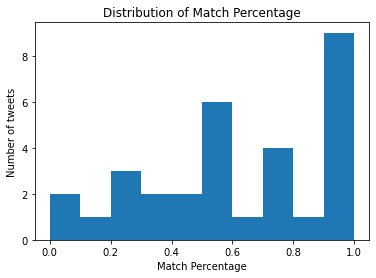

In [27]:
# Histogram to visualise distribution of match percentage data
plt.hist(df['Match_Percentage'])
plt.xlabel('Match Percentage')
plt.ylabel('Number of tweets')
plt.title('Distribution of Match Percentage')

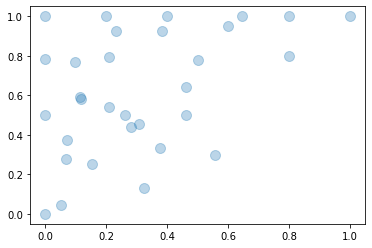

In [30]:
plt.plot(df['Slang_Percentage'], df['Match_Percentage'], 'o', alpha=0.3, markersize=10)

In [31]:
df.corr()

,Slang_Percentage,Match_Percentage
Slang_Percentage,1.000000,0.433974
Match_Percentage,0.433974,1.000000


In [24]:
import statsmodels.formula.api as smf

In [32]:
results = smf.ols('Match_Percentage ~ Slang_Percentage', data = df).fit()

In [33]:
results.params

Intercept           0.459521
Slang_Percentage    0.509961
dtype: float64